In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('data.csv')

df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [5]:
df['categories'].unique()

array(['Fiction', 'Detective and mystery stories', 'American fiction',
       'Christian life', 'Authors, English', 'Africa, East',
       'Hyland, Morn (Fictitious character)', 'Adventure stories',
       'Arthurian romances', 'Fantasy fiction', nan, 'English drama',
       'Country life', 'English fiction', 'Clergy',
       'Aubrey, Jack (Fictitious character)',
       'Detective and mystery stories, English', 'Black Death',
       'Human cloning', 'Science fiction', 'Great Britain',
       'American essays', 'China', 'Capitalism', 'Ireland',
       'Juvenile Fiction', "Children's stories, English",
       'Male friendship', 'Literary Collections',
       'Beresford, Tommy (Fictitious character)',
       'Imaginary wars and battles', 'Dysfunctional families',
       'Poirot, Hercule (Fictitious character)', 'Christmas stories',
       'Marple, Jane (Fictitious character)', 'Belgians',
       'Battle, Superintendent (Fictitious character)',
       'Baggins, Frodo (Fictitious character

In [6]:
df.drop(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'thumbnail', 'published_year', 'average_rating', 'num_pages', 'ratings_count'], axis = 1, inplace = True)

In [7]:
df.head()

,categories,description
0,Fiction,A NOVEL THAT READERS and critics have been eag...
1,Detective and mystery stories,A new 'Christie for Christmas' -- a full-lengt...
2,American fiction,Volume Two of Stephen Donaldson's acclaimed se...
3,Fiction,"A memorable, mesmerizing heroine Jennifer -- b..."
4,Christian life,Lewis' work on the nature of love divides love...


In [8]:
category = pd.get_dummies(df['categories'])
selected_categories = ['Fiction', 'Detective and mystery stories', 'American fiction', 'Christian life', 'Human cloning']
category = category[selected_categories]
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='categories')
df_baru

,description,Fiction,Detective and mystery stories,American fiction,Christian life,Human cloning
0,A NOVEL THAT READERS and critics have been eag...,1,0,0,0,0
1,A new 'Christie for Christmas' -- a full-lengt...,0,1,0,0,0
2,Volume Two of Stephen Donaldson's acclaimed se...,0,0,1,0,0
3,"A memorable, mesmerizing heroine Jennifer -- b...",1,0,0,0,0
4,Lewis' work on the nature of love divides love...,0,0,0,1,0
...,...,...,...,...,...,...
6805,This collection of the timeless teachings of o...,0,0,0,0,0
6806,NaN,0,0,0,0,0
6807,NaN,0,0,0,0,0
6808,Since the three volume edition ofHegel's Philo...,0,0,0,0,0


In [9]:
df_baru.dropna(subset=['description'])

,description,Fiction,Detective and mystery stories,American fiction,Christian life,Human cloning
0,A NOVEL THAT READERS and critics have been eag...,1,0,0,0,0
1,A new 'Christie for Christmas' -- a full-lengt...,0,1,0,0,0
2,Volume Two of Stephen Donaldson's acclaimed se...,0,0,1,0,0
3,"A memorable, mesmerizing heroine Jennifer -- b...",1,0,0,0,0
4,Lewis' work on the nature of love divides love...,0,0,0,1,0
...,...,...,...,...,...,...
6803,This book tells the tale of a man who goes on ...,0,0,0,0,0
6804,"Wisdom to Create a Life of Passion, Purpose, a...",0,0,0,0,0
6805,This collection of the timeless teachings of o...,0,0,0,0,0
6808,Since the three volume edition ofHegel's Philo...,0,0,0,0,0


In [10]:
description = df_baru['description'].values
label = df_baru[['Fiction', 'Detective and mystery stories', 'American fiction', 'Christian life', 'Human cloning']].values

In [14]:
from sklearn.model_selection import train_test_split
description_latih, description_test, label_latih, label_test = train_test_split(description, label, test_size=0.2)

# Memastikan bahwa semua nilai adalah string
description_latih = description_latih.astype(str)
description_test = description_test.astype(str)


In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(description_latih)


sekuens_latih = tokenizer.texts_to_sequences(description_latih)
sekuens_test = tokenizer.texts_to_sequences(description_test)

padded_latih = pad_sequences(sekuens_latih, padding='post',maxlen=25,truncating='post')
padded_test = pad_sequences(sekuens_test, padding='post',maxlen=25,truncating='post')

In [16]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90 and logs.get('accuracy') > 0.90):
      print('\nakurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()

In [18]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30

akurasi telah mencapai 90%
171/171 - 16s - loss: 0.1708 - accuracy: 0.9690 - val_loss: 0.2513 - val_accuracy: 0.9949 - 16s/epoch - 93ms/step


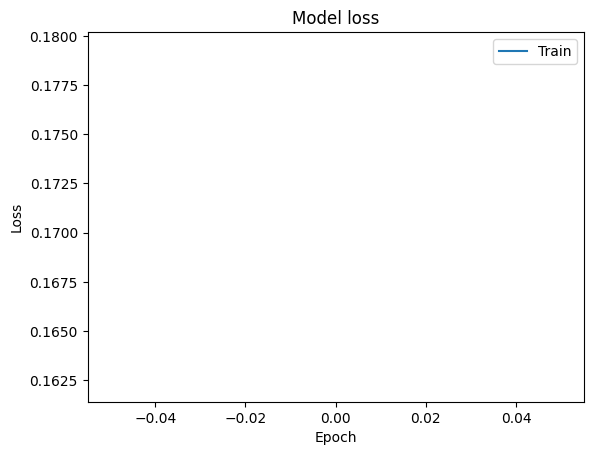

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

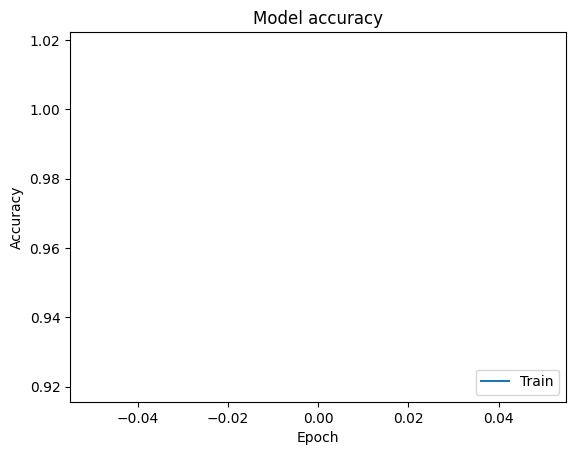

In [24]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()